# Chapter 7. Convolutional Neural Networks Applied to Image Classification

TENSORFLOW

170508288/170498071 [==============================] - 2s 0us/step
Category: [2]


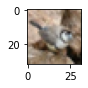

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

cifar = keras.datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(f'Category: {train_labels[90]}')
plt.figure(figsize=(1, 1))
plt.imshow(train_images[90])
plt.show()

In [12]:
## CONVOLUTIONAL NEURAL NETWORK
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
import numpy as np 
import logging 
tf.get_logger().setLevel(logging.ERROR)

In [3]:
EPOCHS = 128
BATCH_SIZE = 32

In [4]:
# Load dataset
cifar_dataset = keras.datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

In [5]:
# Standardize dataset 
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

In [6]:
# Change labels to one-hot.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [7]:
# MODEL
model = Sequential()
model.add(Conv2D(64, (5,5), strides=(2,2), activation='relu', padding='same', input_shape=(32,32,3),
                 kernel_initializer='he_normal', bias_initializer='zeros'))
model.add(Conv2D(64, (3,3), strides=(2,2), activation='relu', padding='same', 
                 kernel_initializer="he_normal", bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(10, activation='softmax', 
                kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                40970     
Total params: 82,762
Trainable params: 82,762
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    train_images, train_labels, validation_data=(test_images, test_labels),
    epochs=EPOCHS, batch_size=BATCH_SIZE,  verbose=2, shuffle=True
)

Epoch 1/128
1563/1563 - 37s - loss: 1.4113 - accuracy: 0.5028 - val_loss: 1.1842 - val_accuracy: 0.5799
Epoch 2/128
1563/1563 - 7s - loss: 1.0623 - accuracy: 0.6300 - val_loss: 1.0891 - val_accuracy: 0.6173
Epoch 3/128
1563/1563 - 7s - loss: 0.9157 - accuracy: 0.6822 - val_loss: 1.0514 - val_accuracy: 0.6376
Epoch 4/128
1563/1563 - 6s - loss: 0.8180 - accuracy: 0.7149 - val_loss: 1.0301 - val_accuracy: 0.6474
Epoch 5/128
1563/1563 - 7s - loss: 0.7383 - accuracy: 0.7444 - val_loss: 1.0970 - val_accuracy: 0.6372
Epoch 6/128
1563/1563 - 7s - loss: 0.6673 - accuracy: 0.7688 - val_loss: 1.1274 - val_accuracy: 0.6392
Epoch 7/128
1563/1563 - 7s - loss: 0.6078 - accuracy: 0.7889 - val_loss: 1.2387 - val_accuracy: 0.6246
Epoch 8/128
1563/1563 - 7s - loss: 0.5553 - accuracy: 0.8041 - val_loss: 1.2101 - val_accuracy: 0.6273
Epoch 9/128
1563/1563 - 6s - loss: 0.5098 - accuracy: 0.8209 - val_loss: 1.2700 - val_accuracy: 0.6389
Epoch 10/128
1563/1563 - 7s - loss: 0.4645 - accuracy: 0.8351 - val_loss

In [14]:
# COUNTERING OVERFITTING
model = Sequential()
model.add(Conv2D(64, (4,4), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2,2), activation='relu', padding='same', strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        3136      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)       

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                    epochs=EPOCHS, verbose=2, shuffle=True, batch_size=BATCH_SIZE)

Epoch 1/128
1563/1563 - 15s - loss: 1.7225 - accuracy: 0.3629 - val_loss: 1.4279 - val_accuracy: 0.4821
Epoch 2/128
1563/1563 - 13s - loss: 1.3797 - accuracy: 0.5005 - val_loss: 1.2126 - val_accuracy: 0.5686
Epoch 3/128
1563/1563 - 13s - loss: 1.2366 - accuracy: 0.5559 - val_loss: 1.1257 - val_accuracy: 0.5964
Epoch 4/128
1563/1563 - 13s - loss: 1.1530 - accuracy: 0.5885 - val_loss: 1.0294 - val_accuracy: 0.6429
Epoch 5/128
1563/1563 - 13s - loss: 1.0916 - accuracy: 0.6159 - val_loss: 0.9668 - val_accuracy: 0.6642
Epoch 6/128
1563/1563 - 13s - loss: 1.0517 - accuracy: 0.6312 - val_loss: 0.9364 - val_accuracy: 0.6804
Epoch 7/128
1563/1563 - 13s - loss: 1.0190 - accuracy: 0.6440 - val_loss: 0.9253 - val_accuracy: 0.6832
Epoch 8/128
1563/1563 - 13s - loss: 0.9896 - accuracy: 0.6557 - val_loss: 0.9081 - val_accuracy: 0.6912
Epoch 9/128
1563/1563 - 13s - loss: 0.9621 - accuracy: 0.6656 - val_loss: 0.8888 - val_accuracy: 0.6991
Epoch 10/128
1563/1563 - 13s - loss: 0.9455 - accuracy: 0.6722 -

PYTORCH

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
from utils import train_model

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 128
BATCH_SIZE = 32

In [20]:
# TRAINING DATASET
transform = T.Compose([T.ToTensor()])
trainset = CIFAR10(root='./pt_data', download=True, train=True, transform=transform)
testset = CIFAR10(root='./pt_data', train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data
Files already downloaded and verified


In [24]:
torch.cuda.empty_cache()

In [25]:
# MODEL
model = nn.Sequential(
    nn.Conv2d(3, 64, 4, stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Conv2d(64, 64, 2, stride=2, padding=1),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Conv2d(64, 32, 3, stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    nn.Linear(32 * 8 * 8, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 10)
)

In [26]:
# Initialize weights with Xavier (Glorot) uniform for all weight layers.
for module in model.modules():
    if type(module) in {nn.Linear, nn.Conv2d}:
        nn.init.xavier_uniform_(module.weight)
        nn.init.constant_(module.bias, 0.0)

In [30]:
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

In [ ]:
# Train model.
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, 
            testset, optimizer, loss_function, 'acc')